In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas.plotting import scatter_matrix


In [74]:
df=pd.read_csv(r"C:\Users\devan\Downloads\stu123.csv")
dp=pd.read_csv(r"C:\Users\devan\Downloads\stu456.csv")

In [75]:
df1=pd.merge(df,dp,on="Name")

In [76]:
df1.head()

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3,Sub4,Sub5,Sub6
0,1,NISHA,F,3,A,60.0,48,74,56.0,51,78
1,2,PRATYUSH,M,3,A,57.0,50,39,48.0,50,54
2,3,PUNEET,M,3,A,NaN,65,43,56.0,65,49
3,4,RAHUL,M,3,B,55.0,55,44,55.0,12,44
4,5,AKANSHA,F,3,B,59.0,45,47,58.0,45,48


In [77]:
#Clean data if required
to_drop = ['Sub4','Sub5','Sub6']
df1.drop(to_drop, inplace=True, axis=1)

In [78]:
df1.head()

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3
0,1,NISHA,F,3,A,60.0,48,74
1,2,PRATYUSH,M,3,A,57.0,50,39
2,3,PUNEET,M,3,A,NaN,65,43
3,4,RAHUL,M,3,B,55.0,55,44
4,5,AKANSHA,F,3,B,59.0,45,47


In [83]:
df["Sub1"].fillna(df['Sub1'].mean()) 

0     60.000000
1     57.000000
2     51.058824
3     55.000000
4     59.000000
5     53.000000
6     48.000000
7     44.000000
8     41.000000
9     43.000000
10    55.000000
11    50.000000
12    58.000000
13    59.000000
14    51.000000
15    42.000000
16    40.000000
17    53.000000
Name: Sub1, dtype: float64

In [84]:
df.isnull().sum()

Roll no    0
Name       0
Gender     0
Sem        0
Batch      0
Sub1       1
Sub2       0
Sub3       0
dtype: int64

In [85]:
#Apply group by functions
df1.groupby("Sem").mean()

,Roll no,Sub1,Sub2,Sub3,Total,Percentage
Sem,,,,,,
3,5.0,52.125000,52.777778,51.888889,156.375000,52.125000
5,14.0,50.111111,53.000000,48.666667,151.777778,50.591111


In [86]:
#Use apply and transform function
df1['Total'] = df1.apply(lambda x:x['Sub1']+x['Sub2']+x['Sub3'],axis=1)
df1['Percentage'] = df1.apply(lambda x:round((x['Total']/300)*100,2),axis=1)
df1['Result'] = df1['Percentage'].transform(lambda x:'GOOD' if (x>50) else 'BAD')
df1

,Roll no,Name,Gender,Sem,Batch,Sub1,Sub2,Sub3,Total,Percentage,Result
0,1,NISHA,F,3,A,60.0,48,74,182.0,60.67,GOOD
1,2,PRATYUSH,M,3,A,57.0,50,39,146.0,48.67,BAD
2,3,PUNEET,M,3,A,NaN,65,43,NaN,NaN,BAD
3,4,RAHUL,M,3,B,55.0,55,44,154.0,51.33,GOOD
4,5,AKANSHA,F,3,B,59.0,45,47,151.0,50.33,GOOD
5,6,RISHABH,M,3,B,53.0,51,55,159.0,53.00,GOOD
6,7,ROHIT,M,3,C,48.0,54,62,164.0,54.67,GOOD
7,8,SAKSHI,F,3,C,44.0,46,40,130.0,43.33,BAD
8,9,SARTHAK,M,3,C,41.0,61,63,165.0,55.00,GOOD
9,10,TARA,F,5,A,43.0,61,38,142.0,47.33,BAD


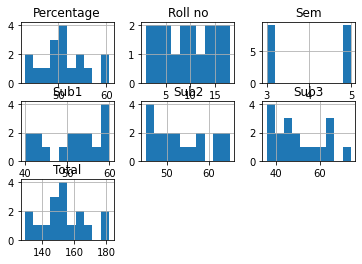

In [87]:
df1.hist()
plt.show()

<BarContainer object of 18 artists>

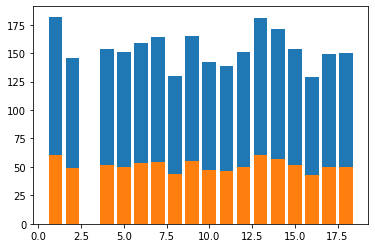

In [62]:
plt.bar(df1['Roll no'],df1['Total'])
plt.bar(df1['Roll no'],df1['Percentage'])

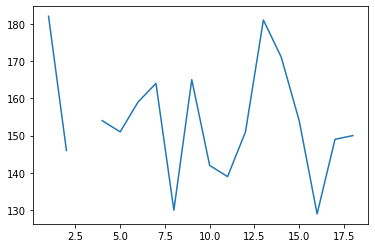

In [63]:
plt.plot(df1['Roll no'],df1['Total'])

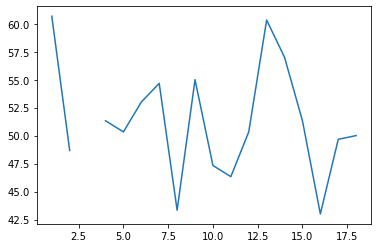

In [64]:
plt.plot(df1['Roll no'],df1['Percentage'])

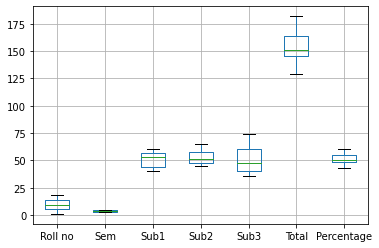

In [65]:
df1.boxplot()

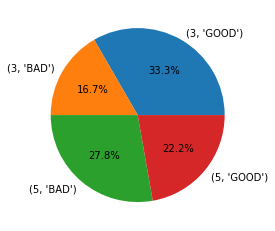

In [66]:
grp=df1.groupby('Sem')
f=grp['Result'].value_counts()
plt.pie(f,labels=f.index,autopct='%.1f%%')
plt.show()

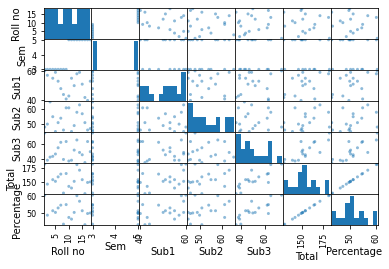

In [67]:
scatter_matrix(df1)
plt.show()